In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
df1 = pd.read_csv('fits/cluster_results_noise_least_squares.csv')
df2 = pd.read_csv('fits/cluster_results_noise_diametrical.csv')
df3 = pd.read_csv('fits/cluster_results_noise_complex_diametrical.csv')
df4 = pd.read_csv('fits/cluster_results_noise_grassmann.csv')
df5 = pd.read_csv('fits/cluster_results_noise_weighted_grassmann.csv')
df6 = pd.read_csv('fits/cluster_results_noise_Watson.csv')
df7 = pd.read_csv('fits/cluster_results_noise_Complex_Watson.csv')
df8 = pd.read_csv('fits/cluster_results_noise_ACG.csv')
df9 = pd.read_csv('fits/cluster_results_noise_Complex_ACG.csv')
df10 = pd.read_csv('fits/cluster_results_noise_MACG.csv')
df11 = pd.read_csv('fits/cluster_results_noise_SingularWishart.csv')
df12 = pd.read_csv('fits/cluster_results_noise_Normal.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

In [35]:
#Rename method kmeans to "Least squares K-means (sign-flipped eigenvectors)"
df['method'] = df['method'].replace('least_squares', 'K-means: Least squares \n(sign-flipped eigenvectors)')
df['method'] = df['method'].replace('diametrical', 'K-means: Diametrical')
df['method'] = df['method'].replace('complex_diametrical', 'K-means: Complex diametrical')
df['method'] = df['method'].replace('grassmann', 'K-means: Grassmann')
df['method'] = df['method'].replace('weighted_grassmann', 'K-means: Weighted Grassmann')
df['method'] = df['method'].replace('Watson', 'Mixture: Watson')
df['method'] = df['method'].replace('Complex_Watson', 'Mixture: Complex Watson')
df['method'] = df['method'].replace('ACG', 'Mixture: ACG')
df['method'] = df['method'].replace('Complex_ACG', 'Mixture: Complex ACG')
df['method'] = df['method'].replace('MACG', 'Mixture: MACG')
df['method'] = df['method'].replace('SingularWishart', 'Mixture: Singular Wishart')
df['method'] = df['method'].replace('Normal', 'Mixture: Gaussian')

# loop through all rows and if row['HMM']==True, then row['method'] = 'HMM: ' + row['method'][9:]
df.loc[df['HMM'], 'method'] = df.loc[df['HMM'], 'method'].apply(lambda x: 'HMM: ' + x[9:])

In [36]:
df['method'].unique()

array(['K-means: Least squares \n(sign-flipped eigenvectors)',
       'K-means: Diametrical', 'K-means: Complex diametrical',
       'K-means: Grassmann', 'K-means: Weighted Grassmann',
       'Mixture: Watson', 'HMM: Watson', 'Mixture: Complex Watson',
       'HMM: Complex Watson', 'Mixture: ACG', 'HMM: ACG',
       'Mixture: Complex ACG', 'HMM: Complex ACG', 'Mixture: MACG',
       'HMM: MACG', 'Mixture: Singular Wishart', 'HMM: Singular Wishart'],
      dtype=object)

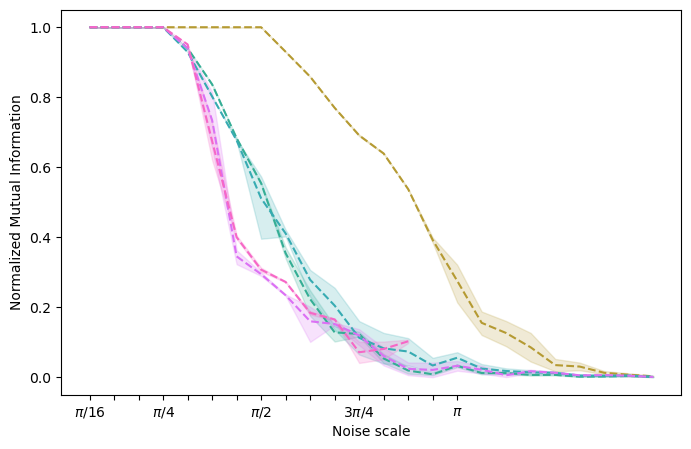

In [37]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]
g = ['Mixture: Complex Watson', 'Mixture: Complex ACG','K-means: Complex diametrical',
     'Mixture: MACG','Mixture: Singular Wishart','K-means: Grassmann','K-means: Weighted Grassmann',
     'Mixture: Watson','Mixture: ACG','K-means: Diametrical','K-means: Least squares \n(sign-flipped eigenvectors)',
     'Mixture: Gaussian']

palette = sns.color_palette("husl", n_colors=len(g)-1, desat=1)
#extend palette with black
palette.append((0.3,0.3,0.3))
plt.figure(figsize=(8,5))
ax = plt.gca()
ax = sns.lineplot(data=df[df['method'].isin(g)], x='noise', y='test_nmi', hue='method',ax=ax,palette=palette,hue_order=g,legend=False)
ax.lines[2].set_linestyle("--")
ax.lines[5].set_linestyle("--")
ax.lines[6].set_linestyle("--")
ax.lines[9].set_linestyle("--")
ax.lines[10].set_linestyle("--")
plt.xticks(range(16), labels=[r'$\pi/16$','','',r'$\pi/4$','','','',r'$\pi/2$',
                              '','','',r'$3\pi/4$','','','',r'$\pi$'])#
plt.ylabel('Normalized Mutual Information')
plt.xlabel('Noise scale')
#remove title from legend
handles, labels = ax.get_legend_handles_labels()
plt.savefig('figs/cluster_results_noise.png', bbox_inches='tight', dpi=300)

In [38]:
import matplotlib.text as mtext
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title

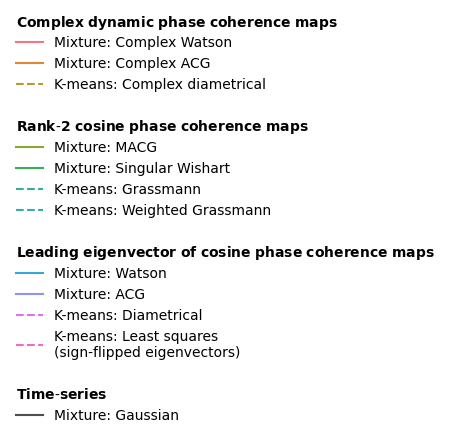

In [39]:
fig,axs = plt.subplots(1,1,figsize=(4,5))
hands = [plt.plot([], color=palette[0],linestyle='--')[0]]

handles2 = ['Complex dynamic phase coherence maps',plt.plot([], color=palette[0])[0],plt.plot([], color=palette[1])[0],plt.plot([], color=palette[2], linestyle='--')[0],
              '','Rank-2 cosine phase coherence maps',plt.plot([], color=palette[3])[0],plt.plot([], color=palette[4])[0],plt.plot([], color=palette[5], linestyle='--')[0],plt.plot([], color=palette[6], linestyle='--')[0],
                '','Leading eigenvector of cosine phase coherence maps',plt.plot([], color=palette[7])[0],plt.plot([], color=palette[8])[0],plt.plot([], color=palette[9], linestyle='--')[0],plt.plot([], color=palette[10], linestyle='--')[0],
                '','Time-series',plt.plot([], color=palette[11])[0]]
# labels2 = ['',g[:3],'',g[3:7],'',g[7:]]
handles2[0] = r'$\bf{Complex}$ $\bf{dynamic}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[5] = r'$\bf{Rank\text{-}2}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[11] = r'$\bf{Leading}$ $\bf{eigenvector}$ $\bf{of}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[17] = r'$\bf{Time\text{-}series}$'

labels2 = ['',g[0],g[1],g[2],'','',g[3],g[4],g[5],g[6],'','',g[7],g[8],g[9],g[10],'','',g[11]]
axs.legend(handles2, labels2, handler_map={str: LegendTitle({'fontsize': 10})},loc='center',bbox_to_anchor=(0, 0.5),frameon=False)
axs.axis('off');
plt.savefig('figs/cluster_results_noise_legend.png', bbox_inches='tight', dpi=300)

In [40]:
palette = sns.color_palette("husl", n_colors=11, desat=1)
# make a palette2 where some colors are repeated
palette2 = [palette[0],palette[1],palette[0],palette[1],palette[2],
            palette[3],palette[4],palette[3],palette[4],palette[5],palette[6],
            palette[7],palette[8],palette[7],palette[8],palette[9],palette[10]
           ]

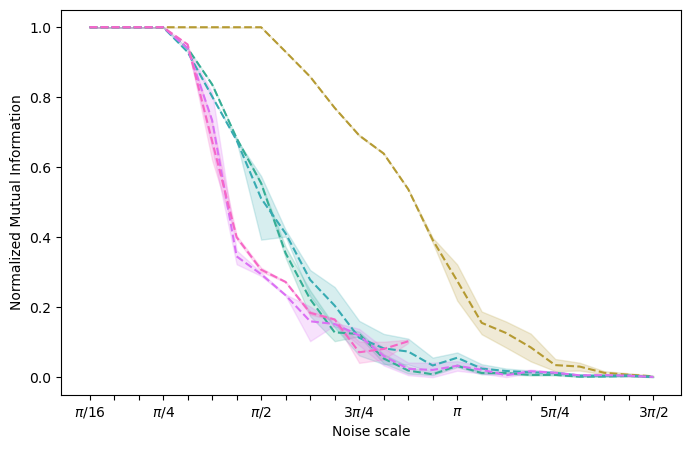

In [41]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]
g = ['Mixture: Complex Watson', 'Mixture: Complex ACG', 'HMM: Complex Watson', 'HMM: Complex ACG', 'K-means: Complex diametrical',
     'Mixture: MACG','Mixture: Singular Wishart','HMM: MACG','HMM: Singular Wishart','K-means: Grassmann','K-means: Weighted Grassmann',
     'Mixture: Watson','Mixture: ACG','HMM: Watson','HMM: ACG','K-means: Diametrical','K-means: Least squares \n(sign-flipped eigenvectors)']

plt.figure(figsize=(8,5))
ax = plt.gca()
ax = sns.lineplot(data=df[df['method'].isin(g)], x='noise', y='test_nmi', hue='method',ax=ax,palette=palette2,hue_order=g,legend=False)
ax.lines[4].set_linestyle("--")
ax.lines[9].set_linestyle("--")
ax.lines[10].set_linestyle("--")
ax.lines[15].set_linestyle("--")
ax.lines[16].set_linestyle("--")
ax.lines[2].set_linestyle(":")
ax.lines[3].set_linestyle(":")
ax.lines[7].set_linestyle(":")
ax.lines[8].set_linestyle(":")
ax.lines[12].set_linestyle(":")
ax.lines[13].set_linestyle(":")
# plt.xticks(range(16), labels=[r'$\pi/16$','','',r'$\pi/4$','','','',r'$\pi/2$',
                              # '','','',r'$3\pi/4$','','','',r'$\pi$'])#'
plt.xticks(range(24), labels=[r'$\pi/16$','','',r'$\pi/4$','','','',r'$\pi/2$',
                              '','','',r'$3\pi/4$','','','',r'$\pi$',
                              '','','',r'$5\pi/4$','','','',r'$3\pi/2$'])#
plt.ylabel('Normalized Mutual Information')
plt.xlabel('Noise scale')
#remove title from legend
handles, labels = ax.get_legend_handles_labels()
plt.savefig('figs/cluster_results_noise_HMM.png', bbox_inches='tight', dpi=300)

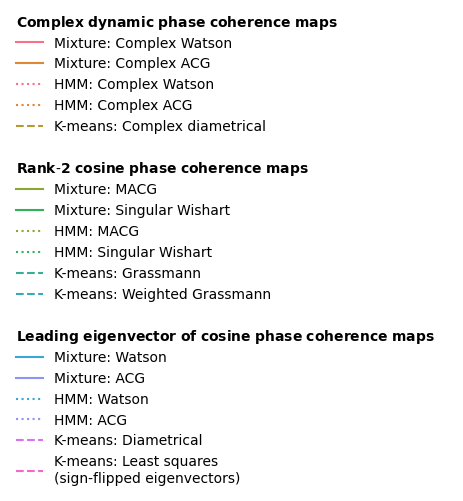

In [42]:
fig,axs = plt.subplots(1,1,figsize=(4,5))

handles2 = ['Complex dynamic phase coherence maps',
            plt.plot([], color=palette[0])[0],
            plt.plot([], color=palette[1])[0],
            plt.plot([], color=palette[0], linestyle=':')[0],
            plt.plot([], color=palette[1], linestyle=':')[0],
            plt.plot([], color=palette[2], linestyle='--')[0],
              '','Rank-2 cosine phase coherence maps',
              plt.plot([], color=palette[3])[0],
              plt.plot([], color=palette[4])[0],
              plt.plot([], color=palette[3], linestyle=':')[0],
              plt.plot([], color=palette[4], linestyle=':')[0],
              plt.plot([], color=palette[5], linestyle='--')[0],
              plt.plot([], color=palette[6], linestyle='--')[0],
                '','Leading eigenvector of cosine phase coherence maps',
                plt.plot([], color=palette[7])[0],
                plt.plot([], color=palette[8])[0],
                plt.plot([], color=palette[7], linestyle=':')[0],
                plt.plot([], color=palette[8], linestyle=':')[0],
                plt.plot([], color=palette[9], linestyle='--')[0],
                plt.plot([], color=palette[10], linestyle='--')[0]]
# labels2 = ['',g[:3],'',g[3:7],'',g[7:]]
handles2[0] = r'$\bf{Complex}$ $\bf{dynamic}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[7] = r'$\bf{Rank\text{-}2}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[15] = r'$\bf{Leading}$ $\bf{eigenvector}$ $\bf{of}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'

labels2 = ['',g[0],g[1],g[2],g[3],g[4],'','',g[5],g[6],g[7],g[8],g[9],g[10],'','',g[11],g[12],g[13],g[14],g[15],g[16]]
axs.legend(handles2, labels2, handler_map={str: LegendTitle({'fontsize': 10})},loc='center',bbox_to_anchor=(0, 0.5),frameon=False)
axs.axis('off');
plt.savefig('figs/cluster_results_noise_HMM_legend.png', bbox_inches='tight', dpi=300)